## <a id='toc1_2_'></a>[Authors](#toc0_)
* **Alireza Arbabi**
* **Hadi Babalou**
* **Ali Padyav**
* **Kasra Hajiheidari**

## <a id='toc1_3_'></a>[Table of Contents](#toc0_)

- [Authors](#toc1_2_)    
- [Table of Contents](#toc1_3_)  
- [Setting Up the Environment](#toc1_4_)    

## <a id='toc1_4_'></a>[Setting Up the Environment](#toc0_)

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings("ignore")

In [82]:
carsData = pd.read_csv("cars.csv")
carsData.head(10)

,Sales in Thousands,Year Resale Value,Price in Thousands,Engine Size,Horsepower,Wheelbase,Width,Length,Curb Weight,Fuel Capacity,Fuel Efficiency,Power Perf Factor,Vehicle Type Car,Vehicle Type Passenger
0,16.919,16.360,21.500,1.8,140,101.2,67.3,172.4,2.639,13.2,28,58.280150,0,1
1,39.384,19.875,28.400,3.2,225,108.1,70.3,192.9,3.517,17.2,25,91.370778,0,1
2,20.397,22.255,23.990,1.8,150,102.6,68.2,178.0,2.998,16.4,27,62.777639,0,1
3,18.780,23.555,33.950,2.8,200,108.7,76.1,192.0,3.561,18.5,22,84.565105,0,1
4,91.561,12.475,21.975,3.1,175,109.0,72.7,194.6,3.368,17.5,25,71.181451,0,1
5,39.350,13.740,25.300,3.8,240,109.0,72.7,196.2,3.543,17.5,23,95.636703,0,1
6,27.851,20.190,31.965,3.8,205,113.8,74.7,206.8,3.778,18.5,24,85.828408,0,1
7,83.257,13.360,27.885,3.8,205,112.2,73.5,200.0,3.591,17.5,25,84.254526,0,1
8,6.536,25.725,39.665,4.6,275,108.0,75.5,200.6,3.843,19.0,22,113.765874,0,1
9,11.185,18.225,31.010,3.0,200,107.4,70.3,194.8,3.770,18.0,22,83.483094,0,1


## Multivariate Regression Implementation


first of all we split data into train and validation sets based on target column.

In [83]:
def split_data_based_on_target_var(target_var1, target_var2):
    X = carsData.drop([target_var1,target_var2], axis=1)
    Y = carsData[[target_var1,target_var2]]
    return train_test_split(X, Y, test_size=0.15, random_state=42)

Multiple regression is a statistical technique that aims to model the relationship between a dependent variable and two or more independent variables.

Multiple regression with n independent variables is expressed as follows:

$$f(x) = \beta _{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} + ... + \beta_{n} x_{n} + c $$

To optimize the model for accurate predictions, multiple regression commonly employs iterative algorithms such as gradient descent.

The main goal of the optimization process is to make our predictions as close as possible to the actual values.
We measure the prediction error using a cost function, usually denoted as $J(\beta)$.

$$ J(\beta)= \frac {1}{m} Σ_{i=0}^{m-1}(y_i - (\hat \beta _{0} + \hat \beta_{1} x_{1} + \hat \beta_{2} x_{2} + \hat \beta_{3} x_{3} + \hat \beta_{4} x_{4} + ... + \hat \beta_{n} x_{n}) )^2  $$

Gradient descent iteratively adjusts the coefficients $(\beta_i)$ to minimize the cost function. The update rule for each coefficient is:

$$\beta_{i} = \beta _ {i} - \alpha \frac {∂J(\beta)}{∂\beta_{i}}$$

$$ \frac {∂J(\beta)}{∂\beta_{i}} = \frac {2}{m}Σ_{j=0}^{m-1}(y_j - (\hat \beta _{0} + \hat \beta_{1} x_{j1} + \hat \beta_{2} x_{j2} + \hat \beta_{3} x_{j3} + \hat \beta_{4} x_{j4} + ... + \hat \beta_{n} x_{jn})) x_{ji} $$



In [85]:
class MultivariateLinearRegression:
    def __init__(self, learning_rate=0.1, tolerance=1e-5, num_targets=1):
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.coefficients = []
        self.num_targets = num_targets

    def fit(self, X, y):
        X_std = (X - X.mean(axis=0)) / X.std(axis=0)
        X_b = np.c_[np.ones((X_std.shape[0], 1)), X_std]
        # self.num_targets = y.shape[1]
        errors = []
        for i in range(self.num_targets):
            coefs = np.random.randn(X_b.shape[1])
            mse_error_per_iteration = []
            while(True):
                y_pred = np.dot(X_b, coefs)
                if(self.num_targets == 1):
                    error = y_pred - y
                    mse_err = mean_squared_error(y, y_pred)
                else:
                    error = y_pred - y.iloc[:, i]
                    mse_err = mean_squared_error(y.iloc[:, i], y_pred)
                mse_error_per_iteration.append(mse_err)
                
                gradient = np.dot(X_b.T, error) / len(y)
                new_coefficients = coefs - self.learning_rate * gradient*2
                change = np.linalg.norm(new_coefficients - coefs)

                coefs = new_coefficients
                
                if change < self.tolerance:
                    errors.append(mse_error_per_iteration)
                    self.coefficients.append(coefs)
                    break
        
        return errors
               
    def predict(self, X):
        X_std = (X - X.mean(axis=0)) / X.std(axis=0)
        X_b = np.c_[np.ones((X_std.shape[0], 1)), X_std]
        predictions = []
        for i in range (self.num_targets):
            predictions.append(np.dot(X_b, self.coefficients[i]))
        return predictions

In [86]:
x , x_t , y, y_t = split_data_based_on_target_var('Horsepower', 'Price in Thousands')
y_hp = y['Horsepower']
y_hp_t = y_t['Horsepower']
y_price = y['Price in Thousands']
y_price_t = y_t['Price in Thousands']
model = MultivariateLinearRegression(num_targets=y.shape[1])
error = model.fit(x, y)
predictions = model.predict(x_t)
hp_error = error[0]
hp_predictions = predictions[0]
price_error = error[1]
price_predictions = predictions[1]

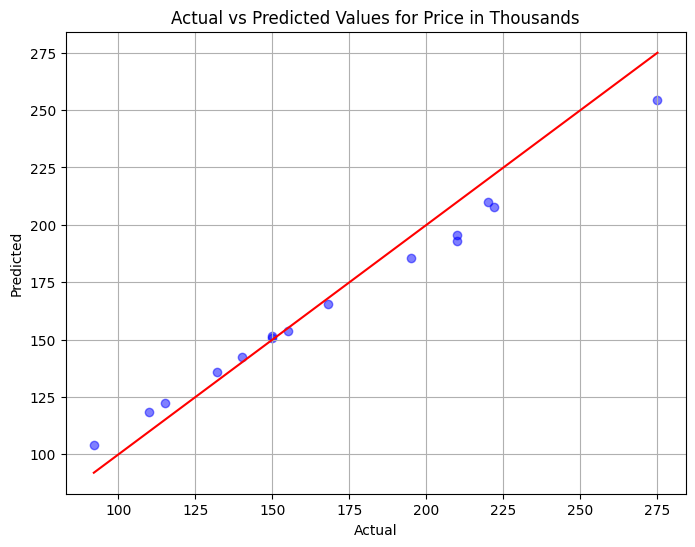

In [88]:
plt.figure(figsize=(8, 6))
plt.scatter(y_hp_t, hp_predictions, color='blue', alpha=0.5)
plt.plot([min(y_hp_t), max(y_hp_t)], [min(y_hp_t), max(y_hp_t)], color='red')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for Horse Power')
plt.grid(True)
plt.show()

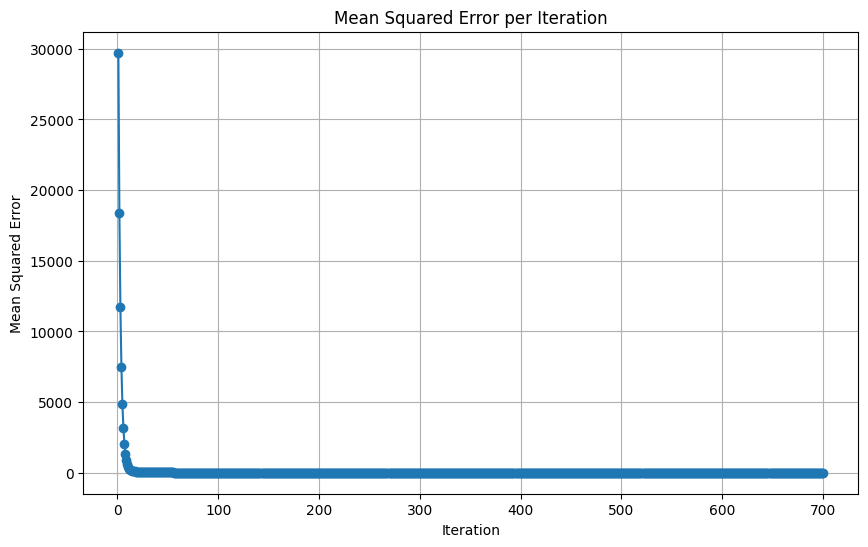

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(hp_error) + 1), hp_error, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error per Iteration')
plt.grid(True)
plt.show()

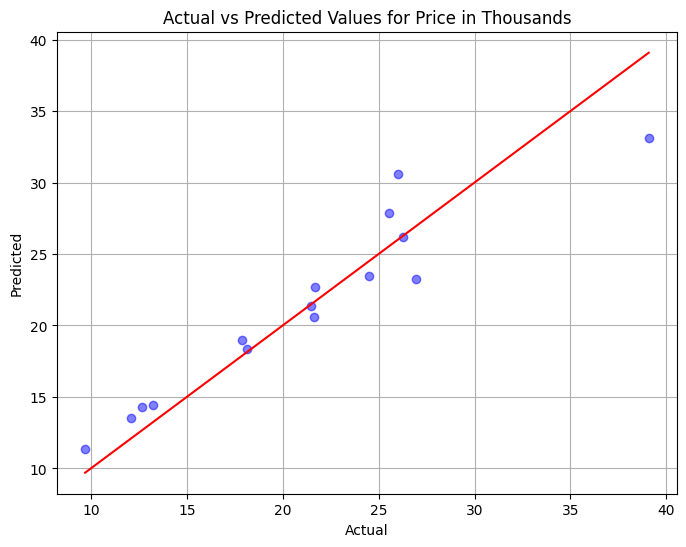

In [90]:
plt.figure(figsize=(8, 6))
plt.scatter(y_price_t, price_predictions, color='blue', alpha=0.5)
plt.plot([min(y_price_t), max(y_price_t)], [min(y_price_t), max(y_price_t)], color='red')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for Price in Thousands')
plt.grid(True)
plt.show()

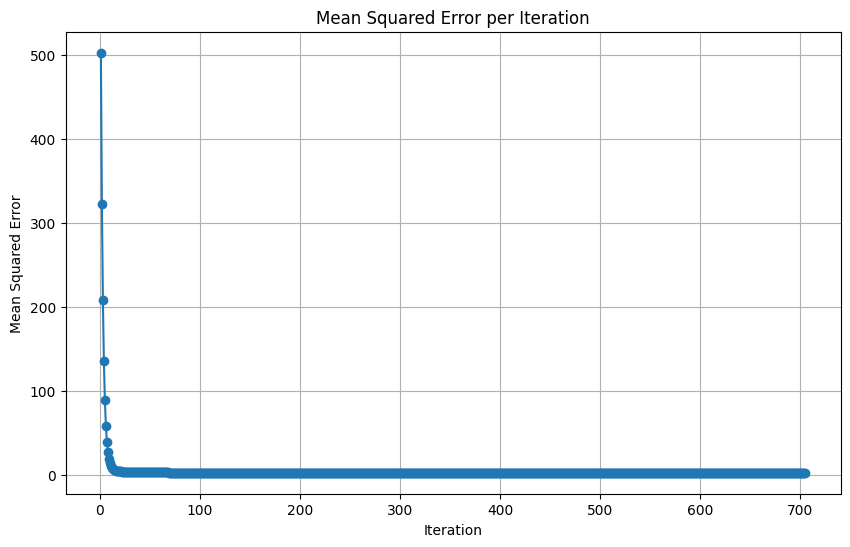

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(price_error) + 1),price_error, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error per Iteration')
plt.grid(True)
plt.show()

In [104]:
random_states = range(50)  
r2_scores = []  

X = carsData.drop(['Horsepower','Price in Thousands'], axis=1)
Y = carsData[['Horsepower','Price in Thousands']]

for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=random_state)
    model = MultivariateLinearRegression(num_targets=y_train.shape[1])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_first = r2_score(y_test.iloc[:,0], y_pred[0])
    r2_second = r2_score(y_test.iloc[:,1], y_pred[1])
    r2 = (r2_first + r2_second) / 2
    r2_scores.append(r2)


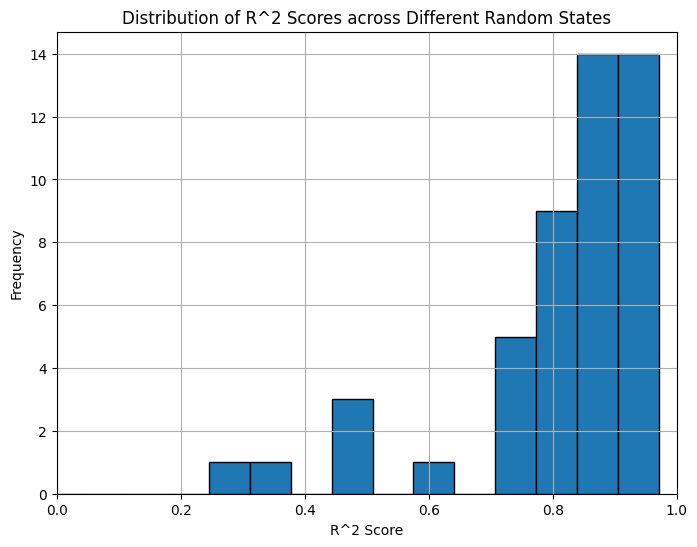

In [105]:
plt.figure(figsize=(8, 6))
plt.hist(r2_scores, bins=20, edgecolor='black')  
plt.xlabel('R^2 Score')
plt.ylabel('Frequency')
plt.title('Distribution of R^2 Scores across Different Random States')
plt.xlim(0, 1) 
plt.grid(True)
plt.show()

## Manual K-Fold Cross Validation Implementation

This technique involves splitting the dataset into k-folds, where **k** is a user-defined parameter. The model is trained on k-1 folds and evaluated on the remaining fold. This process is repeated k times, with each fold used as the validation set once. The performance on the k validation sets is averaged to estimate the performance on new, unseen data and provide a more robust estimate of the model's performance.


In [109]:
def k_fold_cross_validation(X, y, k=5):
    num_samples = len(X)
    fold_size = num_samples // k
    indices = np.random.permutation(num_samples)
    scores = []
    
    for i in range(0, num_samples, fold_size):
        val_indices = indices[i:i+fold_size]
        train_indices = np.concatenate([indices[:i], indices[i+fold_size:]])
        
        X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
        X_val, y_val = X.iloc[val_indices], y.iloc[val_indices]
        
        model = MultivariateLinearRegression(num_targets=y.shape[1])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        score_first = mean_squared_error(y_val.iloc[:,0], y_pred[0])
        score_second = mean_squared_error(y_val.iloc[:,1], y_pred[1])
        score = (score_first + score_second) / 2
        print("Iterations {} score:".format(i/20 + 1), score)
        scores.append(score)
    
    return np.mean(scores)

X_fold = carsData.drop(['Horsepower','Price in Thousands'], axis=1)
Y_fold = carsData[['Horsepower','Price in Thousands']]

k_fold_score = k_fold_cross_validation(X_fold, Y_fold)
print("K-Fold Cross-Validation MSE:", k_fold_score)


Iterations 1.0 score: 44.57801730934627
Iterations 2.0 score: 52.93428485210603
Iterations 3.0 score: 105.0465630857087
Iterations 4.0 score: 27.407290733050726
Iterations 5.0 score: 111.29488174722424
K-Fold Cross-Validation MSE: 68.2522075454872
